## TCC III
   -Testes em diferentes conjuntos de imagens hiperespectrais

---
- @author: Gustavo Serpeloni
- @description: TCC - Ciencia da Computação
- @version: 3.0
- @anaconda_version: 3.7
---

### Importando bibliotecas:

In [1]:
import sys  
sys.path.insert(0, './src/utils/')
sys.path.insert(0, './src/operators/')
sys.path.insert(0, './src/orientacao-relativa/')
import pandas as pd
import time
import cv2 as cv
import math
import imagesFunctions as img
import matching as match
import dataFrames as dataFrame
import calculations as calc
import correlation
import operators as operator
import orientacao_relativa as relativeOrientation
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
print("OpenCv version:",cv.__version__)
CMAKE_ARGS="-DOPENCV_ENABLE_NONFREE=ON"

OpenCv version: 4.9.0


In [3]:
def selectOperator(name):
    if(name == 'SIFT'):
        return operator.SIFT;
    elif(name == 'ORB'):
        return operator.ORB;
    elif(name == 'SURF'):
        return operator.SURF;

---
###                               Global Variables:


In [4]:
operatorName = 'SIFT'

In [5]:
operator = selectOperator(operatorName);
title = operatorName;
resultPath = "/resultados/"+operatorName+'/';

---

### 1. Leitura das Imagens de entrada: 
- Tipo de imagem utilizada: .PGM coletada por uma camera Hiperespectral Rikola
- Local: Campo de teste - Unesp ASA

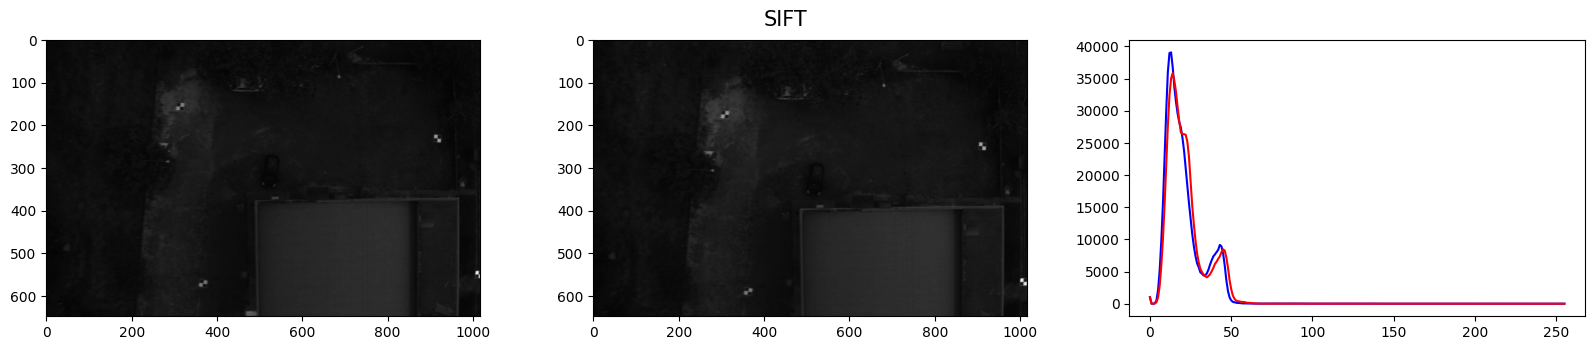

In [6]:
originalImage= img.openImgs(title);

---

### 2. Aplicação - Operadoradores de Interesse
- Deteccao de keypoints para as imagens de entrada
- results:  {[0]: Keypoints, [1]: Descritores dos Kp, [2]: Imagem com pontos selecionados} 

In [7]:
#Extract the keypoints with the intresting operator
start = time.time()
dataResultsImage1 = operator(originalImage[0]);
img1_PointsSelected = dataResultsImage1[2];

dataResultsImage2 = operator(originalImage[1]);
img2_PointsSelected = dataResultsImage2[2];
end = time.time()
print('Time to select the points into image: ', end-start, 'seconds')

Time to select the points into image:  0.18262815475463867 seconds


[ WARN:0@0.560] global shadow_sift.hpp:13 SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


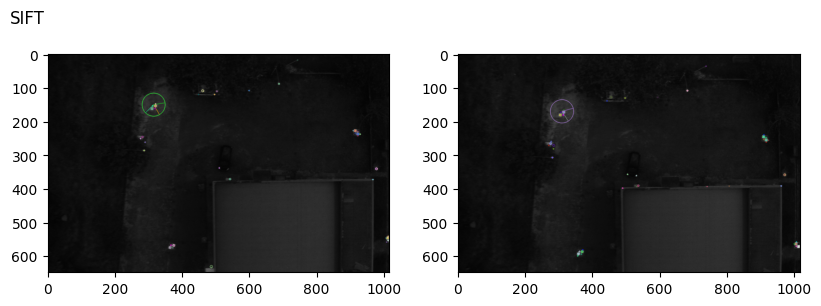

In [8]:
imageData = (dataResultsImage1, dataResultsImage2);
img.img_side_by_side(imageData, title);

In [9]:
#Write Result Images: 
baseImgName= operatorName + "_extract_keypoints_";
basePath = resultPath+baseImgName;
nameImage1= "b00_03000.jpg";
nameImage2= "b10_03000.jpg";

img.write_Image(basePath+nameImage1, img1_PointsSelected);
img.write_Image(basePath+nameImage2, img2_PointsSelected);

#### 2.1 Qtd. de Keypoints e Descritores Encontrados - Conjunto de Imagem 

In [10]:
#Gerando Dataframes referente a quantidade de keypoints + descritores encontrados.
dataFrame.createDataFrame(dataResultsImage1, dataResultsImage2, operatorName);

,Keypoints Img1,Keypoints Img 2
0,63,79


---
###  3. Matching dos keypoints (Brute Force Matching)
- [Brute-Force.link](https://docs.opencv.org/master/dc/dc3/tutorial_py_matcher.html)

- (list_kp1, list_kp2, kp_selec_1) : Lista da keypoints gerados e selecionados

- dados_conjx : { [0]: Img1 - x , [1]: Img1 - y , [2]: Img2 - x, [3]: Img2 - y, [4]: deltaX, [5]: deltaY, [6]: dataFrame } 

- sift_data_x[0] (img1) :  { [0]: Keypoints, [1]: Descritores dos Kp, [2]: Imagem com pontos selecionados } 

In [11]:
correlationName = operatorName + '/' + operatorName + "_Keypoints_brute_force_matching.jpg";
limiar = 0.8;

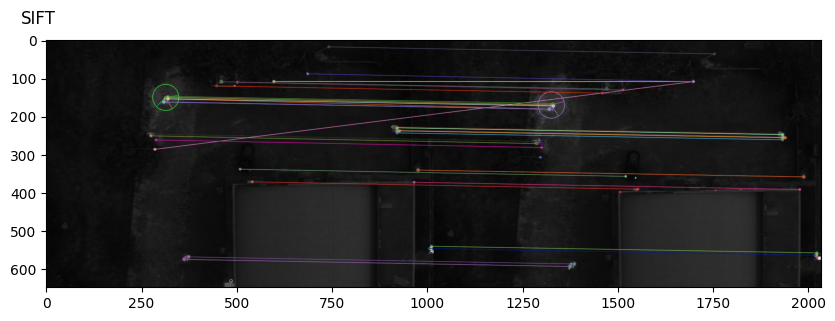

Time to match the selected points betwen images  0.2078266143798828 seconds


In [12]:
#Gerando Lista de  keypoints e descritores: 
start = time.time()
(keypoints_list_img1, keypoints_list_img2, keypoints_correlated)= match.bf_matching(dataResultsImage1,  dataResultsImage2, limiar, correlationName, title);
end = time.time()
print('Time to match the selected points betwen images ', end-start, 'seconds')

In [13]:
#Quantidade de pontos correlacionados: 
display('Quantidade de pontos Correlacionados', len(keypoints_correlated) )

'Quantidade de pontos Correlacionados'

44

###  3.1 Gerando cordenadas espaciais para os pontos selecionados

In [14]:
#Impressao dos dados : 
numberTableRows = 50;
result = dataFrame.getTiePointsSpacialPosition(keypoints_list_img1, keypoints_list_img2, numberTableRows, operatorName, title);
spacialData_img1 = [result[0], result[1]];
spacialData_img2 = [result[2], result[3]];

'Cordenadas_Espaciais - SIFT'

,Img1 (X),Img1 (Y),Img2 (X),Img2 (Y),deltaX,deltaY
0,274.76562,250.94505,269.71381,271.24823,5.05181,-20.30318
1,280.41290,246.28925,274.85242,265.86298,5.56048,-19.57373
2,280.41290,246.28925,274.85242,265.86298,5.56048,-19.57373
3,285.52512,286.31631,681.73376,108.53632,-396.20864,177.77999
4,288.24881,261.83804,283.41528,281.60443,4.83353,-19.76639
5,309.02606,162.19872,303.88361,180.97765,5.14245,-18.77893
6,309.02606,162.19872,303.88361,180.97765,5.14245,-18.77893
7,310.66599,153.85533,312.64099,180.82300,-1.97500,-26.96767
8,313.72745,150.06305,308.81366,169.90533,4.91379,-19.84228
9,313.72745,150.06305,308.81366,169.90533,4.91379,-19.84228


---
### 4. Verificando o erro quadratico medio da correlacao entre os pontos das duas imagens:
#### EQM [O que é o Vies de um EQM e tbm estudr melhor sobre o EQM para gerar corretamente os dados]
---

In [15]:
calc.calculoErro([result[4], result[5]], 'Teste Error')

Teste Error


,Somatorio-x,Qtd.Dados-x,REQM_Dx,Vies_Dx,,Somatorio-y,Qtd.Dados-y,REQM_Dy,Vies_Dy
0,165119.008606,44,61.259324,-6.300951,,46749.190708,44,32.59573,-14.038879


---
### 6. Gerando Orientação Relativa para os pontos : 
- Orientação Relativa
- Como gerar uma orientação relativa e estudar para que serve uma. Entender o que é e como funciona o restante esta bem legal e apresentavel 

#### 6.1 - Informações do sensor (Camera Rikola)

In [16]:
sensorName= 'Sensor 1'
col= 1017
lin= 648
pixelLength= 0.00555
focalLength= 8.70739032
(x0, y0)= (-0.04172982, -0.30083176) #Ponto principal
(k1, k2, k3)= (-0.00454910, -0.000009496728, -0.000000982926) #Distorção radial
(p1, p2)= (0.000031822393, 0.000003396015) #Distorção descentrada

#### 6.2 - Obtendo o centro de cordenadas do sistema

In [17]:
#*Criar função para esse centro de cordenadas
cx= ((col-1)/2)
cy= ((lin-1)/2)
#display("2. Centro do Sistema de Imagem: ",cx,cy)

#### 6.3 - Transforma os keypoints para coordenadas em mm com relacao ao centro de coordenadas obtidas acima

In [18]:
#Inserir as cordenadas espaciais ou os keypoints puros? 
data_transform_img1 = relativeOrientation.transformacao(spacialData_img1, pixelLength, cx, cy);
data_transform_img2 = relativeOrientation.transformacao(spacialData_img2, pixelLength, cx, cy);

,X,Y
0,0.23913,1.29445
1,0.23913,1.26311
2,0.21076,1.26311
3,0.19564,1.23474
4,0.08033,1.21962
...,...,...
81,-0.27284,0.75113
82,-0.09590,0.75113
83,-0.09590,0.92807
84,-1.23772,0.92807


,X,Y
0,0.26999,1.32249
1,0.26999,1.29397
2,-1.98820,1.29397
3,0.22247,-0.96422
4,0.10887,1.24645
...,...,...
81,-0.37841,0.64556
82,-0.19467,0.64556
83,-0.19467,0.82931
84,-1.33480,0.82931


#### 6.4 - Translada Pontos: Move os pontos em mm para as posições se referenciando aos pontos principais (x0, y0) 

In [19]:
data_transladada_img1 = relativeOrientation.transladar_pontos(data_transform_img1,x0,y0);
data_transladada_img2 = relativeOrientation.transladar_pontos(data_transform_img2,x0,y0);

#### 6.5 - Correcao Radial Simetrica: Calcula o raio da distancia do centro ate o ponto de interesse

In [20]:
data_correc_img1 = relativeOrientation.correcao_distorcado_radial_simetrica(data_transladada_img1, data_transform_img1, k1, k2,k3);
data_correc_img2 = relativeOrientation.correcao_distorcado_radial_simetrica(data_transladada_img2, data_transform_img2, k1, k2,k3);

,xf,yf
0,0.283734,1.610838
1,0.283625,1.578544
2,0.254912,1.578456
3,0.239532,1.549217
4,0.122915,1.533437


,xf,yf
0,0.315100,1.639878
1,0.314986,1.610452
2,-2.004994,1.632889
3,0.264717,-0.665629
4,0.151804,1.561070


#### 6.6 - Gerando Arquivo final DepRo

###### Funcao para gerar os dados para o dep_RO:
- data_img = [[data_transf], [data_transladado], [data_correcao_readiometrica], [SensorX] ]
- [data_transf] = [[x1,y1], [x2,y2], ..., [xn, yn]]
- [data_transladada] = [[x1,y1], [x2,y2], ..., [xn, yn]]

#Equação de colinearidade 

In [21]:
#relativeOrientation.dep_RO(data_transladada_img1,data_transladada_img2, focalLength);

## 7 - Gerando comparacao das informacoes por Homografia
- Uso do RANSAC

In [22]:
start = time.time()
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)

des1 = np.float32(dataResultsImage1[1])
des2 = np.float32(dataResultsImage2[1])

matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.

good = []
for m,n in matches:
 if m.distance < 0.7*n.distance:
     good.append(m)

In [23]:
MIN_MATCH_COUNT = 10
kp1 = dataResultsImage1[0]
kp2 = dataResultsImage2[0]

img1 = originalImage[0]
img2 = originalImage[1]

if len(good)>MIN_MATCH_COUNT:
 src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
 dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
 M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
 matchesMask = mask.ravel().tolist()
 h,w = img1.shape
 pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
 dst = cv.perspectiveTransform(pts,M)
 img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
else:
 print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
 matchesMask = None

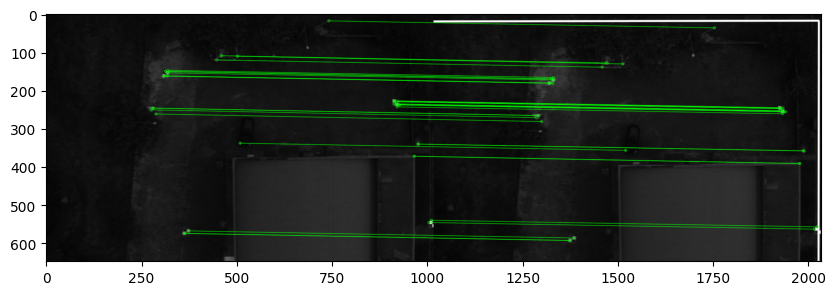

Time to match the selected points betwen images  0.20917153358459473 seconds


In [24]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
 singlePointColor = None,
 matchesMask = matchesMask, # draw only inliers
 flags = 2)
img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.imshow(img3, 'gray'),plt.show()
end = time.time()
print('Time to match the selected points betwen images ', end-start, 'seconds')

In [25]:
#Quantidade de pontos correlacionados: 
display('Quantidade de pontos Correlacionados', len(keypoints_correlated));

'Quantidade de pontos Correlacionados'

44